In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
file_path = '/content/drive/MyDrive/DASI/1x1/dasi.zip'
# Tentukan folder untuk ekstrak file ZIP
extract_to = '/content/drive/MyDrive/DASI/1x1'

# Membuat folder jika belum ada
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Membuka dan mengekstrak file ZIP
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    print(f'File berhasil dibongkar di: {extract_to}')


KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_dir = '/content/drive/MyDrive/DASI/1x1/split/train'
val_dir = '/content/drive/MyDrive/DASI/1x1/split/val'
test_dir = '/content/drive/MyDrive/DASI/1x1/split/test'

In [4]:
# Menyiapkan parameter
image_size = (100, 100)  # Ukuran gambar yang diresize
batch_size = 32

# Menyiapkan data training dan validation dengan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi gambar
    rotation_range=20,     # Rotasi gambar untuk augmentasi
    width_shift_range=0.1, # Geser gambar secara horizontal
    height_shift_range=0.1,# Geser gambar secara vertikal
    shear_range=0.1,       # Transformasi geser
    zoom_range=0.1,        # Zoom pada gambar
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'    # Untuk menangani area kosong setelah augmentasi
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    train_dir,       # Path ke folder training dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'    # Klasifikasi 2 kelas (ada dasi, tidak ada dasi)
)

# Menyiapkan data validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk data validation
validation_generator = validation_datagen.flow_from_directory(
    val_dir,  # Path ke folder validation dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)




Found 720 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [5]:
# Membuat model dengan MobileNetV2 (gunakan pre-trained weights dari ImageNet)
base_model = MobileNetV2(weights='imagenet',  # Menggunakan bobot yang dipra-latih pada ImageNet
                         include_top=False,  # Tidak menggunakan lapisan fully-connected dari MobileNetV2
                         input_shape=(100, 100, 3))

# Membekukan bobot dari model pre-trained agar tidak dilatih ulang
base_model.trainable = True
# Membekukan lapisan-lapisan sebelum lapisan fine-tuning
#for layer in base_model.layers[:100]:
#    layer.trainable = False


<ipython-input-5-806e2f1566f5>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet',  # Menggunakan bobot yang dipra-latih pada ImageNet


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Menambahkan lapisan-lapisan tambahan untuk tugas klasifikasi biner
model = models.Sequential([
    base_model,  # Menambahkan model dasar (MobileNetV2)
    layers.GlobalAveragePooling2D(),  # Pooling untuk mereduksi dimensi
    layers.Dense(128, activation='relu'),  # Lapisan dense untuk pemrosesan lebih lanjut
    layers.Dense(1, activation='sigmoid')  # Output dengan fungsi sigmoid untuk klasifikasi biner
])

# Menyusun model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Melatih model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.8895 - loss: 0.2131 - val_accuracy: 0.8333 - val_loss: 1.9792
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 6.8563e-10
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9946 - loss: 0.0109 - val_accuracy: 0.9889 - val_loss: 0.0517
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9974 - loss: 0.0164 - val_accuracy: 0.9444 - val_loss: 0.6882
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9848 - loss: 0.0982 - val_accuracy: 0.5000 - val_loss: 15.8987
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9911 - loss: 0.0375 - val_accuracy: 0.8667 - val_loss: 1.4595
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9954 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 1.2781e-06
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 1.8993e-04 - val_accuracy: 1.0000 - val_lo

In [8]:
# Menyimpan model
model.save('model_dasi_mobilenetv2.keras')

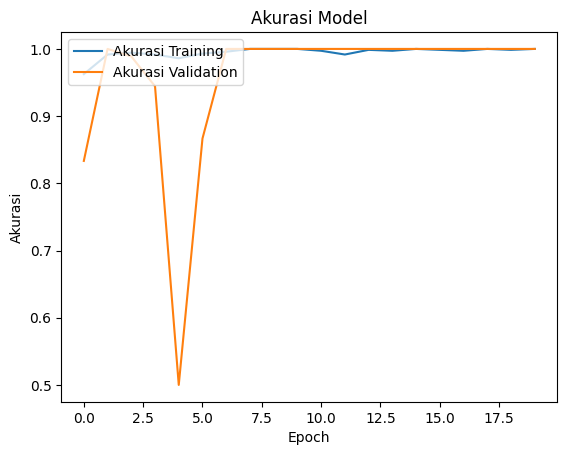

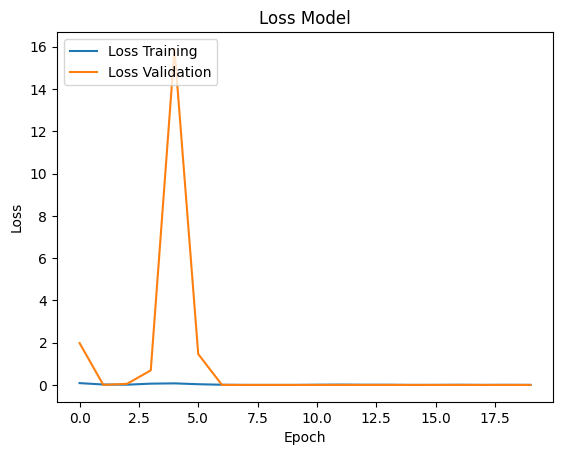

In [7]:
# Menampilkan grafik akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='upper left')
plt.show()

# Menampilkan grafik loss
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menyiapkan parameter
image_size = (100, 100)  # Ukuran gambar yang diresize
batch_size = 32


# Menyiapkan data test
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi gambar

# Path ke folder test dataset

# Generator untuk data test
test_generator = test_datagen.flow_from_directory(
    test_dir,              # Path ke folder test dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',   # Klasifikasi 2 kelas (ada dasi, tidak ada dasi)
    shuffle=False          # Agar urutan data tidak berubah
)

# Menilai kinerja model pada data test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Loss pada data test: {test_loss}")
print(f"Akurasi pada data test: {test_accuracy}")

# Prediksi gambar dari folder test
predictions = model.predict(test_generator, batch_size=batch_size)

# Menampilkan hasil prediksi
for i in range(len(predictions)):
    # Dapatkan label asli dan prediksi untuk setiap gambar
    real_label = test_generator.classes[i]
    pred_label = (predictions[i] > 0.5)  # Ambil 1 jika prediksi > 0.5 (ada dasi), 0 jika tidak ada dasi
    print(f"Gambar {i+1} - Prediksi: {'Ada Dasi' if pred_label == 1 else 'Tidak Ada Dasi'}, Label Asli: {'Ada Dasi' if real_label == 1 else 'Tidak Ada Dasi'}")


Found 90 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 1.0000 - loss: 1.6851e-17
Loss pada data test: 1.0925088856328844e-17
Akurasi pada data test: 1.0
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 912ms/step
Gambar 1 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 2 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 3 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 4 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 5 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 6 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 7 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 8 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 9 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 10 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 11 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gambar 12 - Prediksi: Tidak Ada Dasi, Label Asli: Tidak Ada Dasi
Gam

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


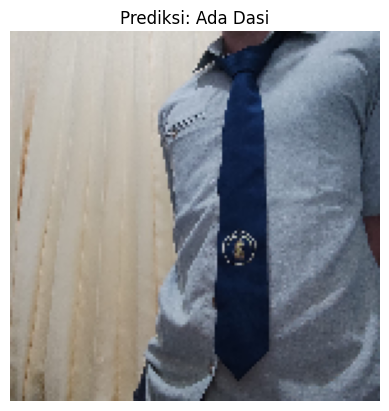

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


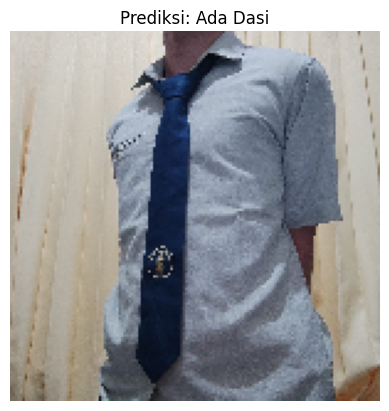

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


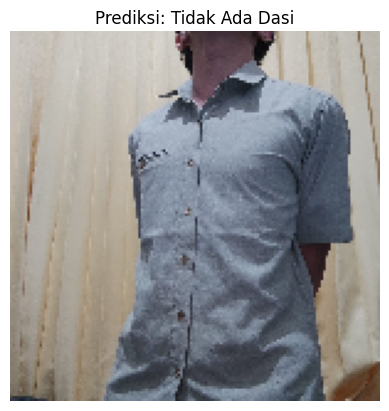

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


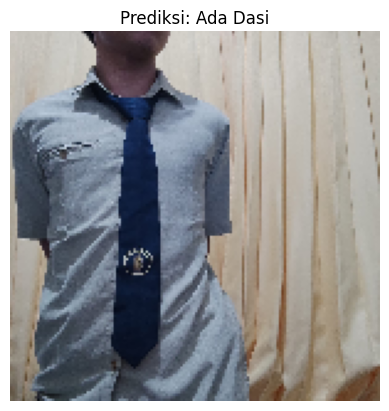

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


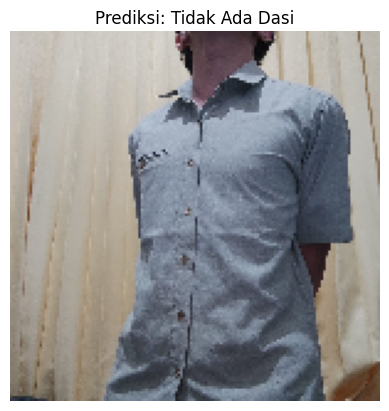

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


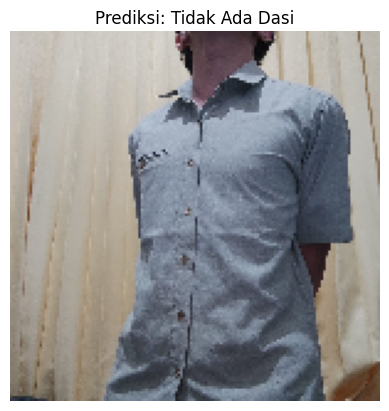

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


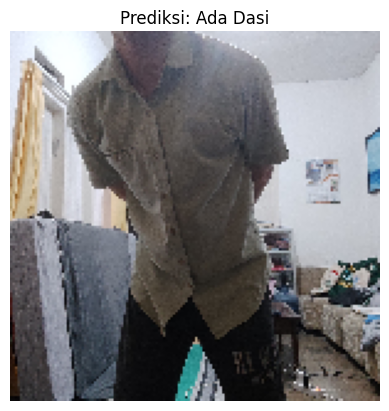

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


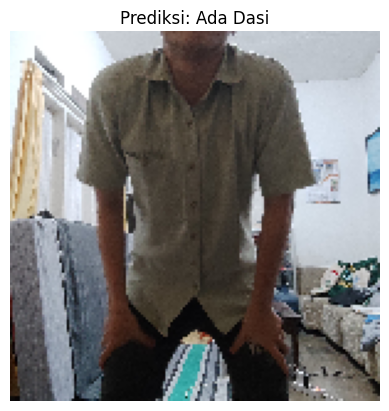

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


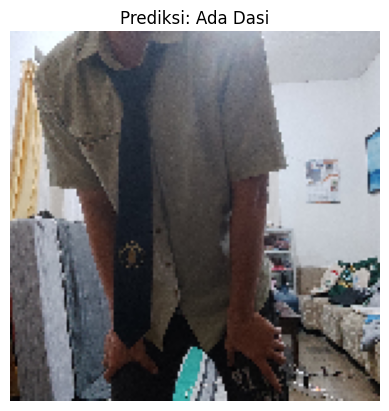

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


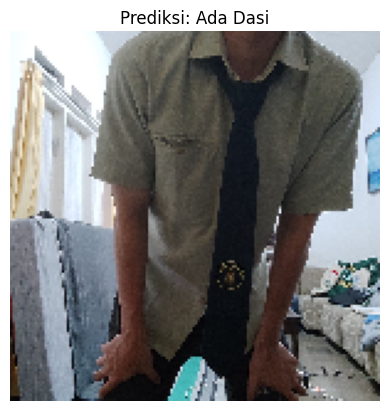

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


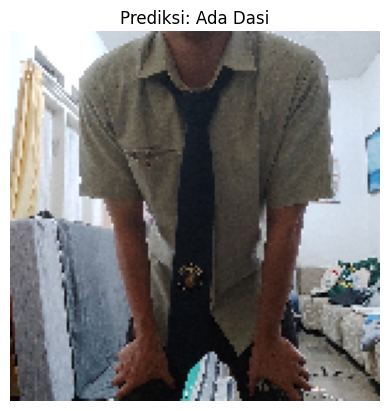

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


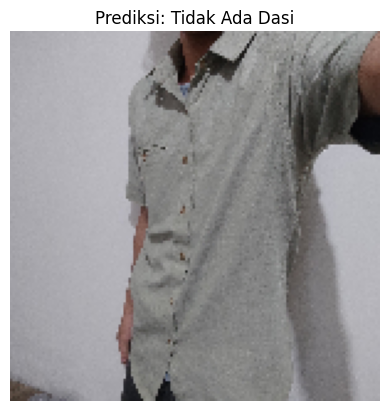

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


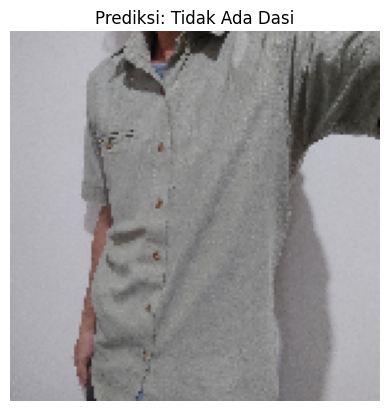

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


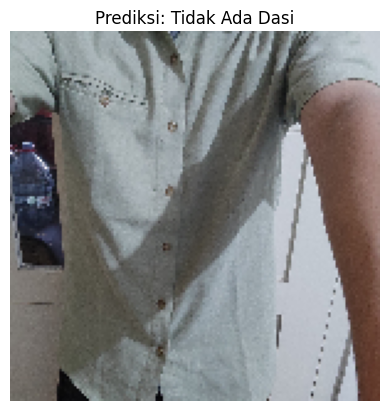

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


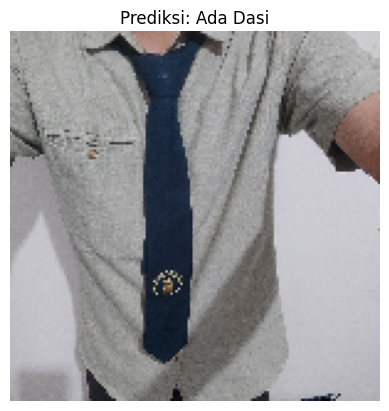

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


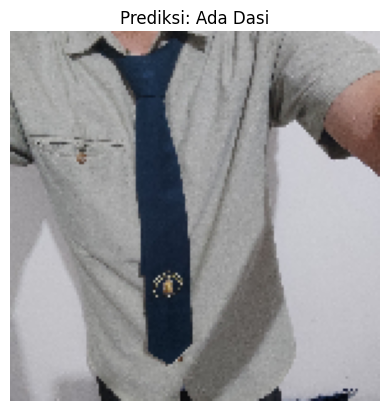

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


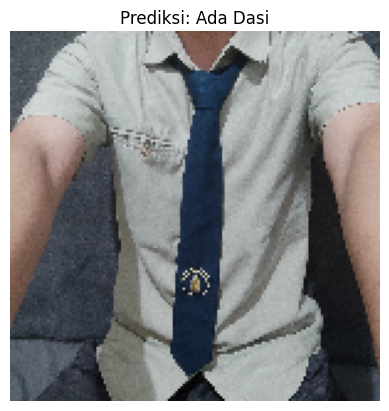

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


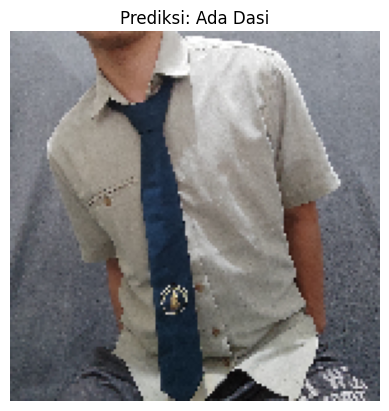

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


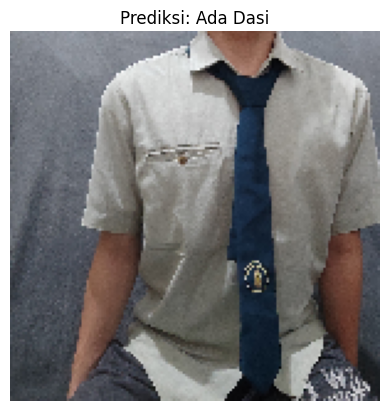

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


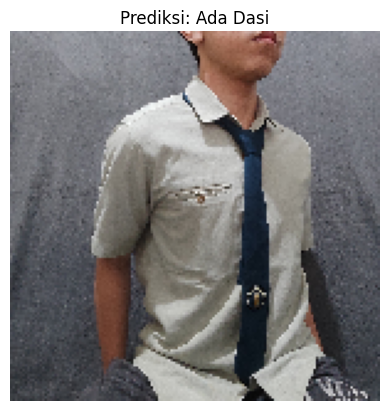

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


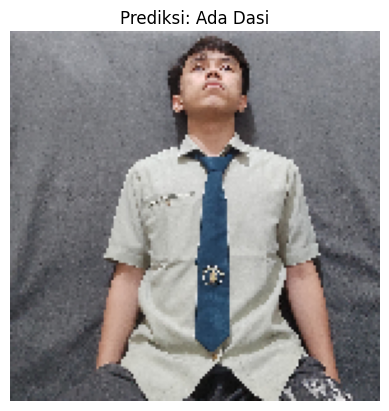

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


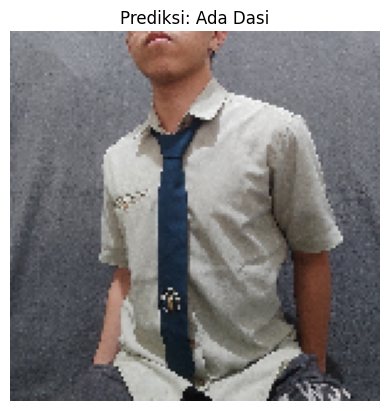

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


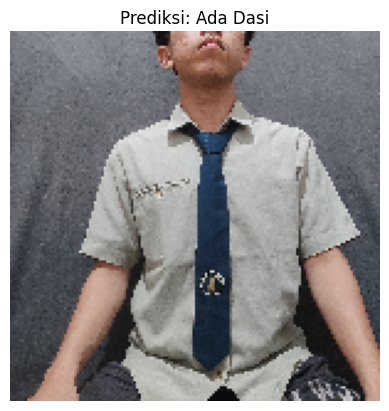

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


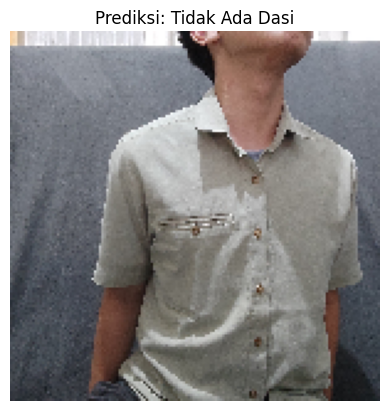

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


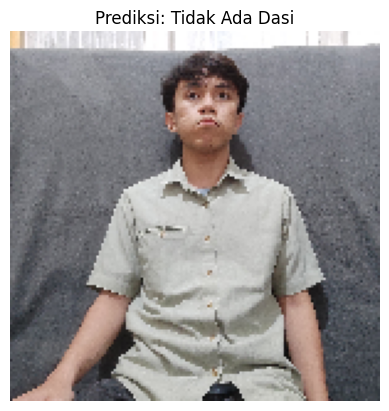

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


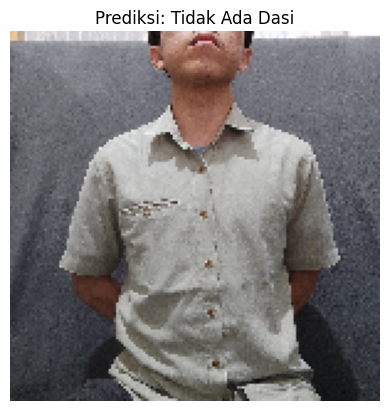

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


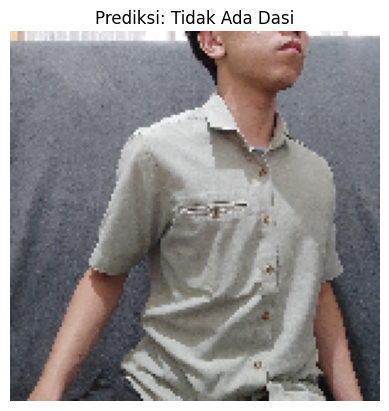

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


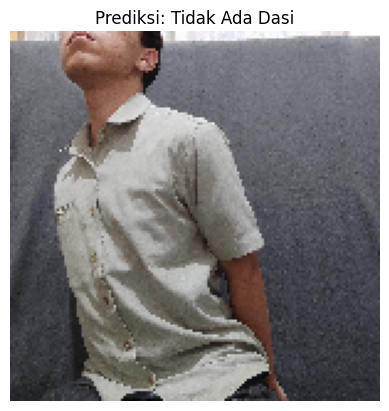

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


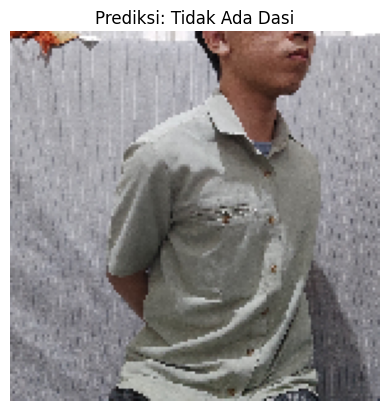

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


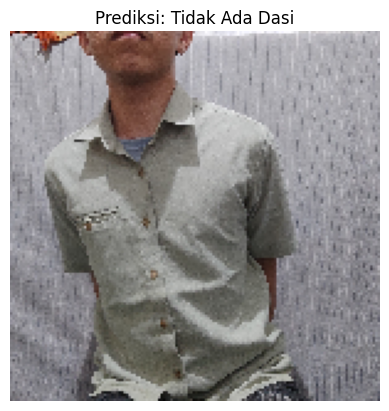

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


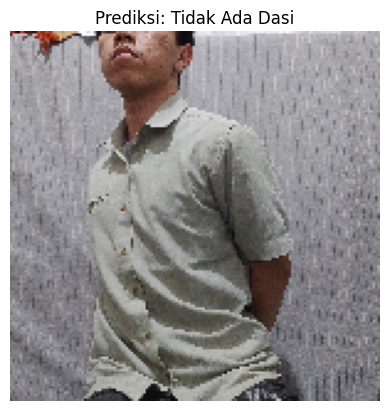

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


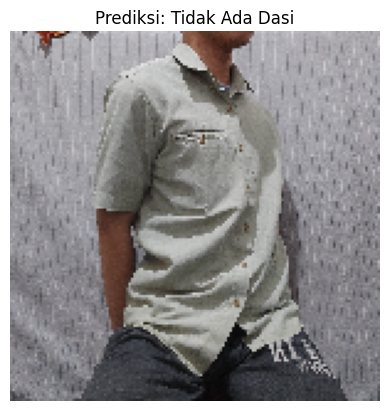

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


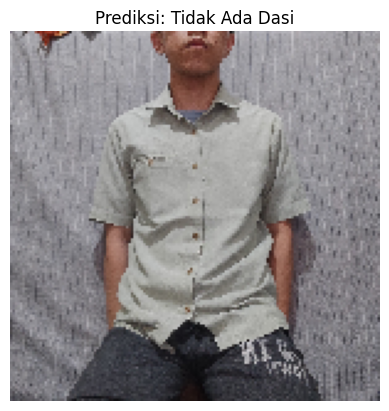

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


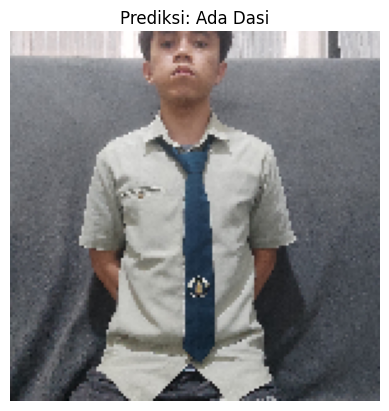

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


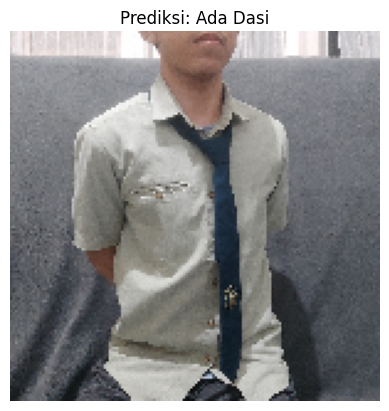

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


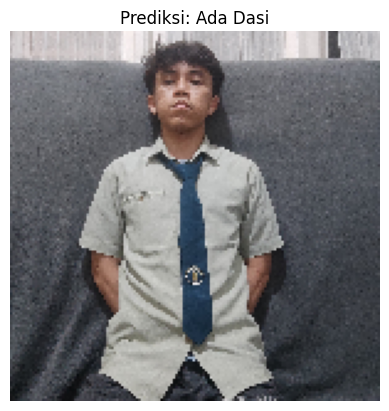

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


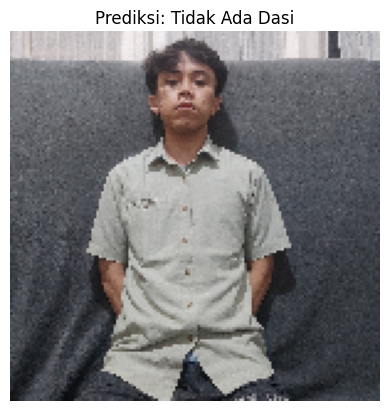

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


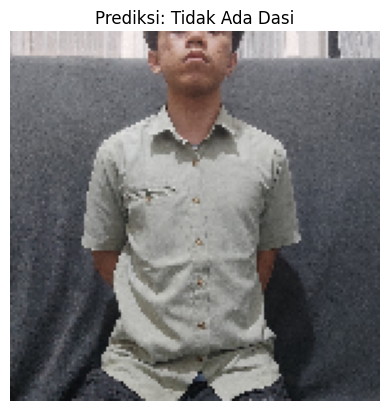

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


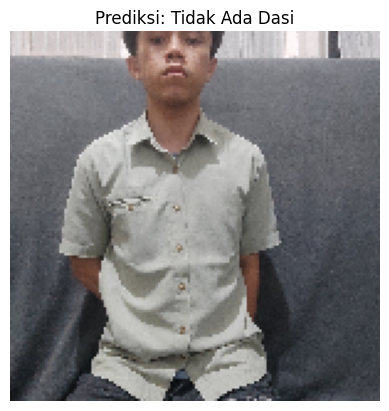

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


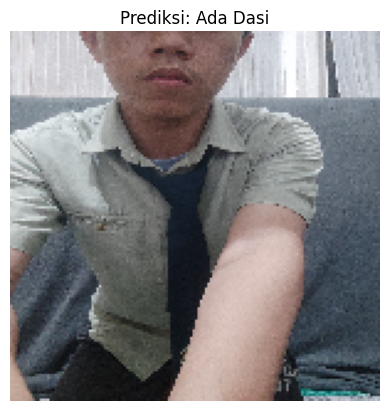

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Memuat model yang sudah dilatih
model = tf.keras.models.load_model('model_dasi_mobilenetv2.keras')

# Tentukan folder tempat gambar yang ingin diuji
test_folder = '/content/drive/MyDrive/DASI/1x1/test'  # Ganti dengan path folder gambar Anda

# Fungsi untuk memuat dan menguji gambar
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))  # Memuat gambar dan resize
    img_array = image.img_to_array(img)  # Mengonversi gambar ke array
    img_array = np.expand_dims(img_array, axis=0)  # Membuat dimensi batch
    img_array /= 255.0  # Normalisasi gambar

    prediction = model.predict(img_array)  # Melakukan prediksi
    if prediction[0] > 0.5:
        return "Tidak Ada Dasi"  # Membalikkan hasil
    else:
        return "Ada Dasi"  # Membalikkan hasil


# Menampilkan prediksi untuk setiap gambar di folder
def test_images():
    # Ambil semua gambar dari folder yang telah ditentukan
    image_files = [f for f in os.listdir(test_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Pastikan hanya 6 gambar yang diuji
    image_files = image_files[:40]  # Batasi 6 gambar pertama

    for img_file in image_files:
        img_path = os.path.join(test_folder, img_file)

        # Memuat dan menampilkan gambar
        img = image.load_img(img_path, target_size=(150, 150))
        plt.imshow(img)
        plt.title(f'Prediksi: {predict_image(img_path)}')  # Menampilkan hasil prediksi di atas gambar
        plt.axis('off')
        plt.show()

# Menjalankan pengujian gambar
test_images()
